<a href="https://colab.research.google.com/github/GenoKiller777/PythonVarios/blob/main/EVALUACI%C3%93N_FINAL_M6_ML_NO_SUPERVIZADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving hespe-data.csv to hespe-data (1).csv
User uploaded file "hespe-data (1).csv" with length 11407 bytes


#### Importación de paquetes

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

#### Lectura de datos

In [5]:
df_base = pd.read_csv('hespe-data.csv', sep = ";")

#### Preprocesamiento de datos

In [6]:
df_familia = df_base[['student_id','mother_ed','farther_ed','siblings','parental_status','mother_occup','father_occup']]

In [7]:
df_familia.isnull().sum()

student_id         0
mother_ed          0
farther_ed         0
siblings           0
parental_status    0
mother_occup       0
father_occup       0
dtype: int64

### Escalamiento de datos

In [8]:
df_preprocess = df_familia[['mother_ed','farther_ed','siblings','parental_status','mother_occup','father_occup']]

scaler = StandardScaler()

In [9]:
scaler.fit(df_preprocess)
df_scaled = scaler.transform(df_preprocess)

In [140]:
pd.DataFrame(df_scaled, columns = df_preprocess.columns)

,mother_ed,farther_ed,siblings,parental_status,mother_occup,father_occup
0,-1.052444,-0.554821,0.142413,-0.352497,-0.446949,1.655083
1,-0.231990,0.319625,-0.595083,-0.352497,-0.446949,-1.363622
2,-0.231990,-0.554821,-0.595083,-0.352497,-0.446949,-1.363622
3,-1.052444,-0.554821,1.617405,-0.352497,-0.446949,-1.363622
4,0.588464,0.319625,-0.595083,-0.352497,-0.446949,0.900407
...,...,...,...,...,...,...
140,-1.052444,-0.554821,-0.595083,1.691988,-0.446949,0.900407
141,-1.052444,-1.429268,1.617405,-0.352497,-0.446949,-1.363622
142,0.588464,1.194072,0.879909,-0.352497,-0.446949,0.900407
143,1.408917,1.194072,-1.332579,-0.352497,0.799351,0.145731


### Análisis de Dimensionalidad


#### Principal Analyst Components

In [11]:
pca = PCA().fit(df_scaled)

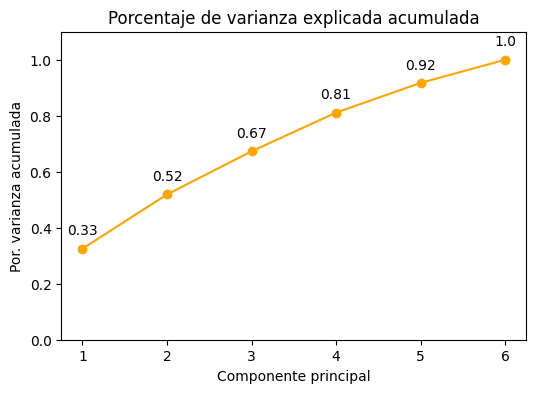

In [12]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df_preprocess.columns)) + 1,
    prop_varianza_acum,
    marker = 'o',
    color = 'orange'
)

for x, y in zip(np.arange(len(df_preprocess.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.show();

##### Se trabajara con 4 componentes ya que entregan el 81% de varianza.

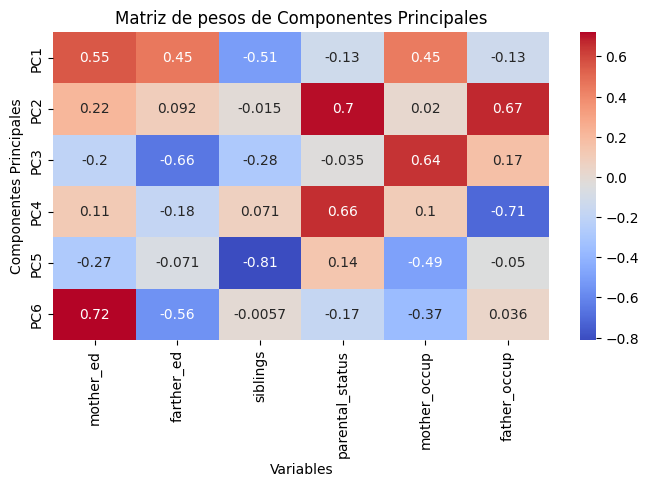

In [13]:
componentes = pd.DataFrame(pca.components_,
                           columns= df_preprocess.columns,
                           index = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6'])


plt.figure(figsize = (8,4))
sns.heatmap(componentes, annot = True, cmap = 'coolwarm')

plt.title("Matriz de pesos de Componentes Principales")
plt.xlabel("Variables")
plt.ylabel("Componentes Principales")
plt.show();

### Realice la reducción al nuevo espacio dimensional.

#### Reducción de dimensionalidad

In [14]:
pca_reduced = PCA(n_components = 4).fit(df_scaled)
df_pca_reduce = pca_reduced.transform(df_scaled)

In [15]:
# Antes de aplicar la reducción de dimensionalidad
df_scaled.shape

(145, 6)

In [16]:
# Después de aplicar la reducción de dimensionalidad
df_pca_reduce.shape

(145, 4)

### Cluster con K-Means

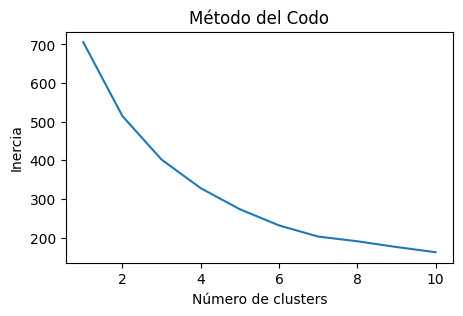

In [17]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(5,3))
# Método del Codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_pca_reduce)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show();

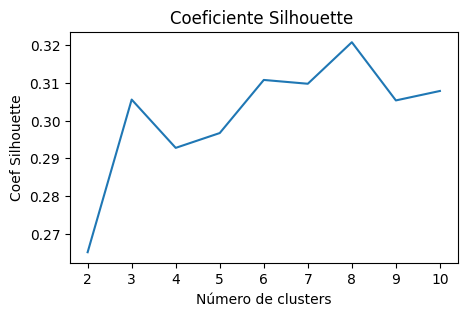

In [18]:
plt.figure(figsize=(5,3))

savg = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 33)
  kmeans.fit(df_pca_reduce)
  silhouette_avg = silhouette_score(df_pca_reduce, kmeans.labels_)
  savg.append(silhouette_avg)

plt.plot(range(2, 11),savg)
plt.title('Coeficiente Silhouette ')
plt.xlabel('Número de clusters')
plt.ylabel('Coef Silhouette')
plt.show()

##### Se trabajara con 6 cluster según lo visto por los gráficos de métricas.

In [19]:
kmeans = KMeans(n_clusters=6, random_state=77, n_init="auto").fit(df_pca_reduce)
label = kmeans.labels_

In [20]:
label = pd.DataFrame(label)
label.columns = ['Clusters_Familia']

In [ ]:
label['Clusters_Familia'].value_counts()

In [213]:
df_final = df_familia.join(label)

## Respuestas

### ¿Cuántos grupos con características homogéneas se aprecian en el set de datos?

* La **Familia 1** con la **Familia 6** _se parecen, en el sentido en que ambas familias ambos padres lograron estudios superiores a los universitarios, tuvieron menos de 4 hijos, lograron mantenerse mayormente casados en porcentaje y sus ocupaciones son mayormente Dependientes, Ama de Casa, Funcionarios de Gobierno y Jubilados._

* La **Familia 2** con la **Familia 4** _se parecen, en el sentido en que ambas familias un solo padre logró estudios superiores a los universitarios, tuvieron más o igual a 5 hijos, lograron mantenerse mayormente casados en porcentaje con porcentaje en Divorcios y sus ocupaciones son mayormente Dependientes, Independiente y Ama de Casa._

* La **Familia 3** con la **Familia 5** _se parecen, en el sentido en que ambas familias un solo padre logró estudios universitarios y algunos un postítulo superior, tuvieron más o igual a 5 hijos, Divorcio o/y uno de los padres murió o ambos y sus ocupaciones son aproximadamente de todos los tipos, pero en muy poco porcentaje._




In [214]:
#Mapeo variable Cluster_Familia
condiciones = [
    (df_final['Clusters_Familia'] == 0),
    (df_final['Clusters_Familia'] == 1),
    (df_final['Clusters_Familia'] == 2),
    (df_final['Clusters_Familia'] == 3),
    (df_final['Clusters_Familia'] == 4),
    (df_final['Clusters_Familia'] == 5)
    ]

valores = ['Cluster_Familia_1', 'Cluster_Familia_2',
           'Cluster_Familia_3', 'Cluster_Familia_4',
           'Cluster_Familia_5', 'Cluster_Familia_6']

df_final['Clusters_Familia'] = np.select(condiciones, valores)

In [215]:
#Mapeo variable mother_ed
condiciones = [
    (df_final['mother_ed'] == 1),
    (df_final['mother_ed'] == 2),
    (df_final['mother_ed'] == 3),
    (df_final['mother_ed'] == 4),
    (df_final['mother_ed'] == 5),
    (df_final['mother_ed'] == 6)
    ]

valores = ['primary school', 'secondary school','high school', 'university','MSc.', 'Ph.D.']

df_final['mother_ed'] = np.select(condiciones, valores)

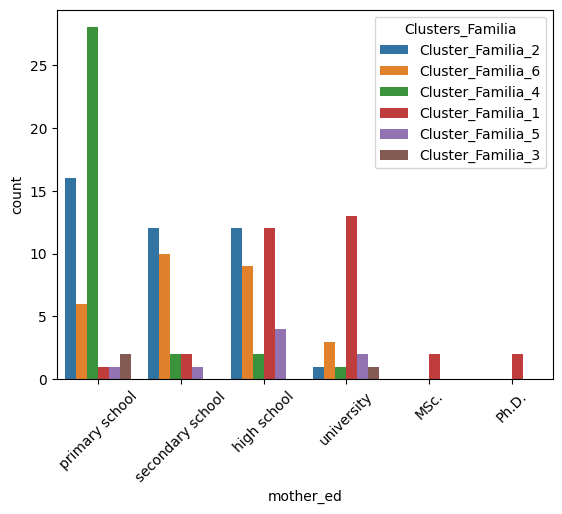

In [216]:
sns.countplot(data=df_final, x="mother_ed",
              hue="Clusters_Familia")

plt.xticks(rotation=45)
plt.show()

In [217]:
#Mapeo variable mother_ed
condiciones = [
    (df_final['farther_ed'] == 1),
    (df_final['farther_ed'] == 2),
    (df_final['farther_ed'] == 3),
    (df_final['farther_ed'] == 4),
    (df_final['farther_ed'] == 5),
    (df_final['farther_ed'] == 6)
    ]

valores = ['primary school', 'secondary school','high school', 'university','MSc.', 'Ph.D.']

df_final['farther_ed'] = np.select(condiciones, valores)

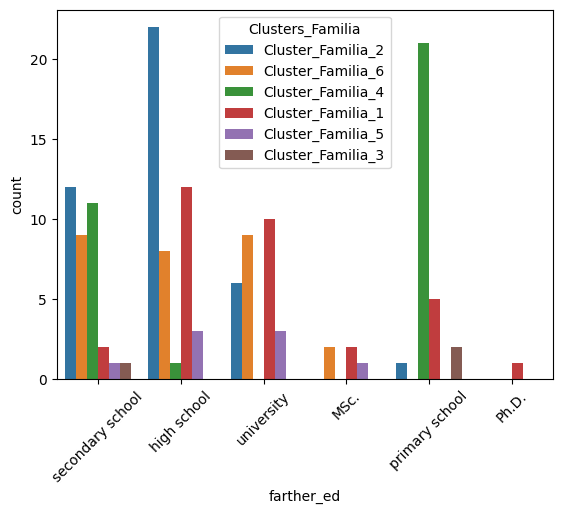

In [218]:
sns.countplot(data=df_final, x="farther_ed",
              hue="Clusters_Familia")

plt.xticks(rotation=45)
plt.show()

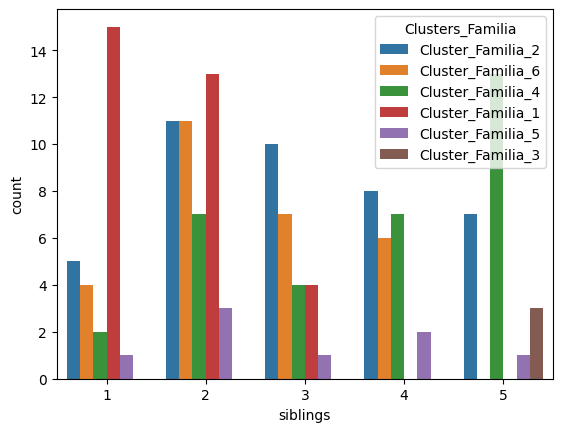

In [219]:
sns.countplot(data=df_final, x="siblings",
              hue="Clusters_Familia")
plt.show()

In [220]:
#Mapeo variable mother_ed
condiciones = [
    (df_final['parental_status'] == 1),
    (df_final['parental_status'] == 2),
    (df_final['parental_status'] == 3)
    ]

valores = ['Casados', 'Divorciados','Murió - uno de ellos o Ambos']

df_final['parental_status'] = np.select(condiciones, valores)

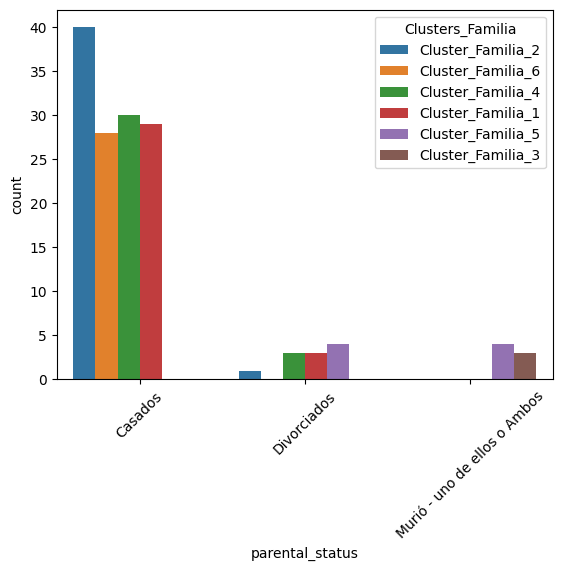

In [221]:
sns.countplot(data=df_final, x="parental_status",
              hue="Clusters_Familia")

plt.xticks(rotation=45)
plt.show()

In [222]:
#Mapeo variable ocupacion mandre
condiciones = [
    (df_final['mother_occup'] == 1),
    (df_final['mother_occup'] == 2),
    (df_final['mother_occup'] == 3),
    (df_final['mother_occup'] == 4),
    (df_final['mother_occup'] == 5),
    (df_final['mother_occup'] == 6)
    ]

valores = ['Jubilada', 'Ama de Casa','Funcionaria del gobierno', 'Dependiente-Privado','Independiente', 'Otro']

df_final['mother_occup'] = np.select(condiciones, valores)

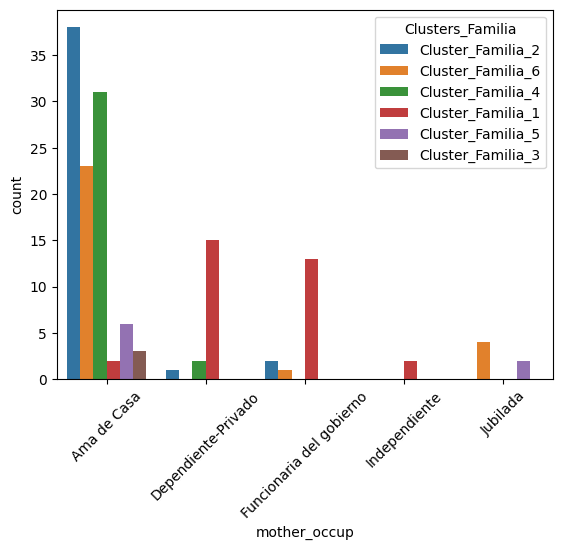

In [223]:
sns.countplot(data=df_final, x="mother_occup",
              hue="Clusters_Familia")


plt.xticks(rotation=45)
plt.show()

In [224]:
#Mapeo variable ocupacion padre
condiciones = [
    (df_final['father_occup'] == 1),
    (df_final['father_occup'] == 2),
    (df_final['father_occup'] == 3),
    (df_final['father_occup'] == 4),
    (df_final['father_occup'] == 5)
    ]

valores = ['Jubilado', 'Funcionario del gobierno', 'Dependiente-Privado','Independiente', 'Otro']

df_final['father_occup'] = np.select(condiciones, valores)

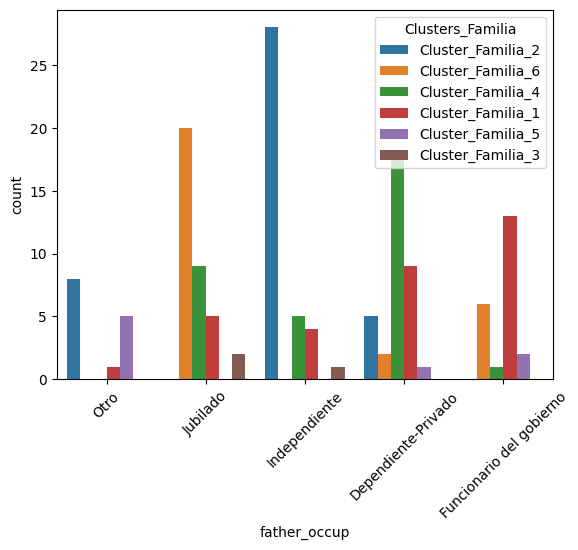

In [225]:
sns.countplot(data=df_final, x="father_occup",
              hue="Clusters_Familia")

plt.xticks(rotation=45)
plt.show()

### De acuerdo a las características de cada grupo identificados, ¿qué nombre le pondría a cada uno de ellos a modo de categorización?

* _Familias ideales o planificadas_ (**Familia 1** & **Familia 6**).
* _Familias regularmente complicadas_ (**Familia 2** & **Familia 4**).
* _Familias con Inconvenientes_ (**Familia 3** & **Familia 5**).



### Dado los grupos que encontro utilice la variable grade, y determine si existe alguna relación entre el rendimiento de los estudiantes y su similaridad en caracterísriscas de familia.

**R.-** _Existe una relación aproximable entre los grupos de familia y su capacidad de que sus hijos obtengan una mejor asignación de puntaje estudiantil, ya que se aprecia que existe un trade-off entre las condiciones de bienestar familias sean sociales, económicas o anímicas con la capacidad de obtener aptitudes o habilidades educacionales optimas en la variable ‘grade’, se puede diferenciar que familias más planificadas conlleva a que sus hijos posean mejores calificaciones o entren en el rango de buenas calificaciones (AA,BC,BB) a comparación con familias con más inconvenientes que solo logran calificaciones del rango (DD,DC,CC), pero en general no se detalla marcada la diferencias ya que entre los grupos de familias entran alumnos con todos los tipos de calificaciones._

In [226]:
df_grade = df_base[['grade']]

In [227]:
df_grade_familia = df_grade.join(label)

In [228]:
#Mapeo varariable Cluster_Familia
condiciones = [
    (df_grade_familia['Clusters_Familia'] == 0),
    (df_grade_familia['Clusters_Familia'] == 1),
    (df_grade_familia['Clusters_Familia'] == 2),
    (df_grade_familia['Clusters_Familia'] == 3),
    (df_grade_familia['Clusters_Familia'] == 4),
    (df_grade_familia['Clusters_Familia'] == 5),
    ]

valores = ['Cluster_Familia_1', 'Cluster_Familia_2',
           'Cluster_Familia_3', 'Cluster_Familia_4',
           'Cluster_Familia_5', 'Cluster_Familia_6']

df_grade_familia['Clusters_Familia'] = np.select(condiciones, valores)

In [229]:
#Mapeo varariable Cluster_Familia
condiciones = [
    (df_grade_familia['grade'] == 0),
    (df_grade_familia['grade'] == 1),
    (df_grade_familia['grade'] == 2),
    (df_grade_familia['grade'] == 3),
    (df_grade_familia['grade'] == 4),
    (df_grade_familia['grade'] == 5),
    (df_grade_familia['grade'] == 6),
    (df_grade_familia['grade'] == 7),
    ]

valores = ['Fail', 'DD','DC', 'CC','CB','BB','BA','AA']

df_grade_familia['grade'] = np.select(condiciones, valores)

In [230]:
#Filtrado por familia
df_grade_familia_1 = df_grade_familia[df_grade_familia["Clusters_Familia"] == 'Cluster_Familia_1']
df_grade_familia_2 = df_grade_familia[df_grade_familia["Clusters_Familia"] == 'Cluster_Familia_2']
df_grade_familia_3 = df_grade_familia[df_grade_familia["Clusters_Familia"] == 'Cluster_Familia_3']
df_grade_familia_4 = df_grade_familia[df_grade_familia["Clusters_Familia"] == 'Cluster_Familia_4']
df_grade_familia_5 = df_grade_familia[df_grade_familia["Clusters_Familia"] == 'Cluster_Familia_5']
df_grade_familia_6 = df_grade_familia[df_grade_familia["Clusters_Familia"] == 'Cluster_Familia_6']

#### _Familias ideales o planificadas_

In [231]:
print(df_grade_familia_1['grade'].value_counts()/sum(df_grade_familia_1['grade'].value_counts())*100)
print("")
print("Cantidad de alumnos que entran en la categoría Familia 1:")
print(len(df_grade_familia_1['grade']))

DC      18.750
CC      15.625
Fail    12.500
DD      12.500
CB      12.500
AA      12.500
BA       9.375
BB       6.250
Name: grade, dtype: float64

Cantidad de alumnos que entran en la categoría Familia 1:
32


In [236]:
print(df_grade_familia_6['grade'].value_counts()/sum(df_grade_familia_6['grade'].value_counts())*100)
print("")
print("Cantidad de alumnos que entran en la categoría Familia 6:")
print(len(df_grade_familia_6['grade']))

DD    32.142857
AA    25.000000
DC    14.285714
BB    10.714286
CC     7.142857
BA     7.142857
CB     3.571429
Name: grade, dtype: float64

Cantidad de alumnos que entran en la categoría Familia 6:
28


#### _Familias regularmente complicadas_

In [232]:
print(df_grade_familia_2['grade'].value_counts()/sum(df_grade_familia_2['grade'].value_counts())*100)
print("")
print("Cantidad de alumnos que entran en la categoría Familia 2:")
print(len(df_grade_familia_2['grade']))

DD      26.829268
BB      19.512195
DC      17.073171
CC      12.195122
BA      12.195122
AA       7.317073
CB       2.439024
Fail     2.439024
Name: grade, dtype: float64

Cantidad de alumnos que entran en la categoría Familia 2:
41


In [234]:
print(df_grade_familia_4['grade'].value_counts()/sum(df_grade_familia_4['grade'].value_counts())*100)
print("")
print("Cantidad de alumnos que entran en la categoría Familia 4:")
print(len(df_grade_familia_4['grade']))

DD      27.272727
CC      24.242424
DC      15.151515
CB      12.121212
BB       9.090909
BA       6.060606
Fail     3.030303
AA       3.030303
Name: grade, dtype: float64

Cantidad de alumnos que entran en la categoría Familia 4:
33


#### _Familias con Inconvenientes_

In [233]:
print(df_grade_familia_3['grade'].value_counts()/sum(df_grade_familia_3['grade'].value_counts())*100)
print("")
print("Cantidad de alumnos que entran en la categoría Familia 3:")
print(len(df_grade_familia_3['grade']))

CC      33.333333
AA      33.333333
Fail    33.333333
Name: grade, dtype: float64

Cantidad de alumnos que entran en la categoría Familia 3:
3


In [235]:
print(df_grade_familia_5['grade'].value_counts()/sum(df_grade_familia_5['grade'].value_counts())*100)
print("")
print("Cantidad de alumnos que entran en la categoría Familia 5:")
print(len(df_grade_familia_5['grade']))

DD      25.0
DC      25.0
Fail    12.5
BB      12.5
BA      12.5
AA      12.5
Name: grade, dtype: float64

Cantidad de alumnos que entran en la categoría Familia 5:
8
